# Prediction of customer attrition for a cell phone service company

# Importing the Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

# Fitting all the columns in page width

In [2]:
pd.pandas.set_option('display.max_columns', None)

# Importing the datasets

In [3]:
dataset = pd.read_excel('C:/Users/MSI-PC/Documents/DataSets/Customer_Attrition_CellPhone.xlsx')

# Understanding the dataset

In [4]:
print(dataset.shape)

(3331, 14)


In [5]:
dataset.head()

,Sno,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
0,1,2951997.0,57.0,1.0,1.0,2.57,0.0,213.0,115.0,78.7,9.56,9.5,No,2012-05-01
1,2,2461448.0,54.0,1.0,0.0,0.00,3.0,134.3,73.0,37.0,7.78,14.7,No,2012-05-01
2,3,3573953.0,20.0,1.0,0.0,0.32,0.0,190.0,109.0,58.2,12.91,6.3,No,2012-05-01
3,4,728293.0,49.0,1.0,0.0,0.21,1.0,119.3,117.0,41.1,10.76,11.1,No,2012-05-01
4,5,6987894.0,142.0,1.0,0.0,0.00,2.0,84.8,95.0,27.0,6.84,14.2,No,2012-05-01


In [6]:
dataset.tail()

,Sno,Customer_ID,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition,Inserted_Date
3326,3327,2461694.0,77.0,1.0,0.0,0.00,5.0,62.4,89.0,26.0,8.50,5.7,Yes,2012-05-01
3327,3328,4893124.0,130.0,1.0,0.0,0.00,0.0,183.0,112.0,38.0,3.65,9.5,No,2012-05-01
3328,3329,7180907.0,111.0,1.0,0.0,0.39,2.0,110.4,103.0,34.9,6.87,7.7,No,2012-05-01
3329,3330,6361098.0,132.0,1.0,0.0,0.00,0.0,81.1,86.0,35.0,12.26,10.3,No,2012-05-01
3330,3331,8589875.0,174.0,1.0,0.0,0.00,3.0,124.3,76.0,45.0,13.86,15.5,No,2012-05-01


Finding the length of unique values for each attribute

In [7]:
dataset.nunique()

Sno                       3331
Customer_ID               3326
Weeks                      212
Contract_Renewal             2
Data_Plan                    2
Data_Usage                 174
Calls_To_Customer_Care      10
DayMins                   1667
DayCalls                   119
MonthlyCharge              656
OverageFee                1024
RoamMins                   162
Customer_Attrition           2
Inserted_Date                1
dtype: int64

# Understanding of variables

In [8]:
dataset.dtypes

Sno                                int64
Customer_ID                      float64
Weeks                            float64
Contract_Renewal                 float64
Data_Plan                        float64
Data_Usage                       float64
Calls_To_Customer_Care           float64
DayMins                          float64
DayCalls                         float64
MonthlyCharge                    float64
OverageFee                       float64
RoamMins                         float64
Customer_Attrition                object
Inserted_Date             datetime64[ns]
dtype: object

In [9]:
dataset.Contract_Renewal.unique()

array([ 1.,  0., nan])

In [10]:
dataset.Data_Plan.unique()

array([ 1.,  0., nan])

In [11]:
dataset.Customer_Attrition.unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
dataset = dataset.drop(['Sno','Customer_ID','Inserted_Date'], axis=1)

# Searching missing values and duplicate rows

In [13]:
#This will check the missing values percentage in columns 
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

Weeks 0.0901  % missing values
Contract_Renewal 0.2702  % missing values
Data_Plan 0.1201  % missing values
DayMins 0.06  % missing values
MonthlyCharge 0.06  % missing values


In [14]:
null_data = dataset[dataset.isnull().any(axis=1)]

In [15]:
null_data.shape

(16, 11)

In [16]:
display(null_data)

,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition
66,78.0,1.0,0.0,0.00,3.0,NaN,93.0,59.0,8.92,9.5,No
95,121.0,1.0,NaN,0.00,3.0,190.7,103.0,49.0,9.18,9.8,No
114,120.0,NaN,1.0,2.84,0.0,200.3,68.0,81.4,11.02,10.5,No
275,NaN,1.0,0.0,0.00,0.0,170.4,108.0,59.0,17.53,11.2,Yes
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,100.0,1.0,NaN,0.32,0.0,278.0,76.0,66.2,8.84,8.3,Yes
502,NaN,0.0,0.0,0.19,0.0,68.5,110.0,42.9,16.86,12.1,No
507,67.0,1.0,0.0,0.22,4.0,310.4,97.0,NaN,3.33,9.2,No
560,114.0,NaN,0.0,0.40,1.0,169.6,85.0,38.0,2.95,7.4,No
585,151.0,1.0,NaN,0.24,4.0,156.4,108.0,49.4,11.67,7.7,No


In [17]:
duplicate = dataset[dataset.duplicated(keep = False)]
duplicate

,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition


# Preprocessing

In [18]:
dataset['Customer_Attrition'] = np.where(dataset['Customer_Attrition']=='Yes',1,0)

Splitting the dataset into X, y

In [19]:
y = dataset['Customer_Attrition']
X = dataset.drop('Customer_Attrition', axis = 1)

### Treating missing values

In [20]:
from numpy import isnan
from sklearn.impute import KNNImputer

In [21]:
imputer = KNNImputer(n_neighbors=3, missing_values = np.nan)
X = imputer.fit_transform(X)

In [22]:
print('Missing: %d' % sum(isnan(X).flatten()))

Missing: 0


# Data exploration and visualization

### Plots

In [23]:
features = dataset.columns

In [24]:
dataset.describe()

,Weeks,Contract_Renewal,Data_Plan,Data_Usage,Calls_To_Customer_Care,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Customer_Attrition
count,3328.000000,3322.000000,3327.000000,3330.000000,3330.000000,3329.000000,3330.000000,3329.000000,3330.000000,3330.000000,3331.000000
mean,101.060397,0.902769,0.276826,0.816495,1.563063,179.731481,100.428529,56.300721,10.051946,10.237027,0.145002
std,39.845384,0.296316,0.447497,1.272796,1.315990,54.477605,20.076165,16.433952,2.535758,2.792802,0.352155
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.600000,87.000000,45.000000,8.330000,8.500000,0.000000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000,0.000000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.300000,114.000000,66.200000,11.770000,12.100000,0.000000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000,1.000000


In [25]:
features_boxplot = ['Weeks', 'Calls_To_Customer_Care', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

In [26]:
dataset_retained = dataset.loc[dataset['Customer_Attrition'] == 0] 
dataset_attrition = dataset.loc[dataset['Customer_Attrition'] == 1]

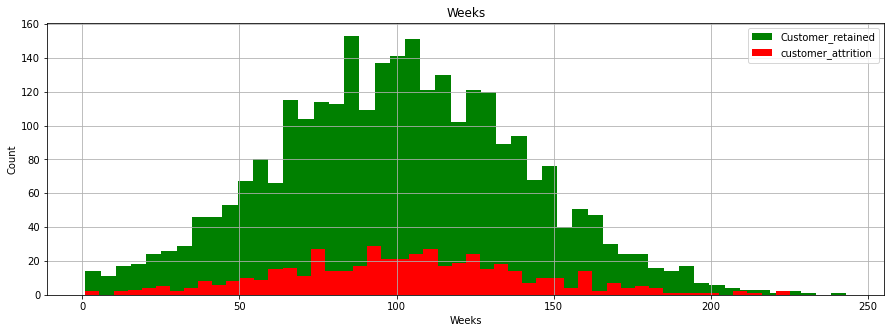

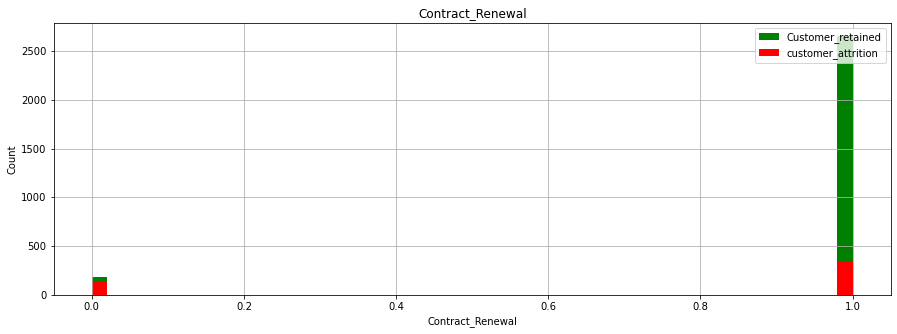

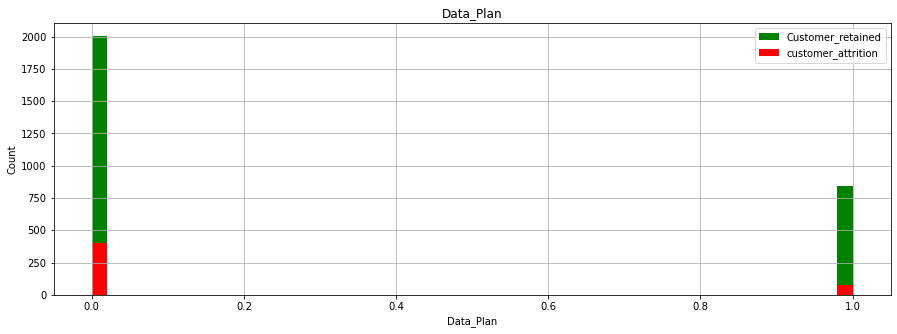

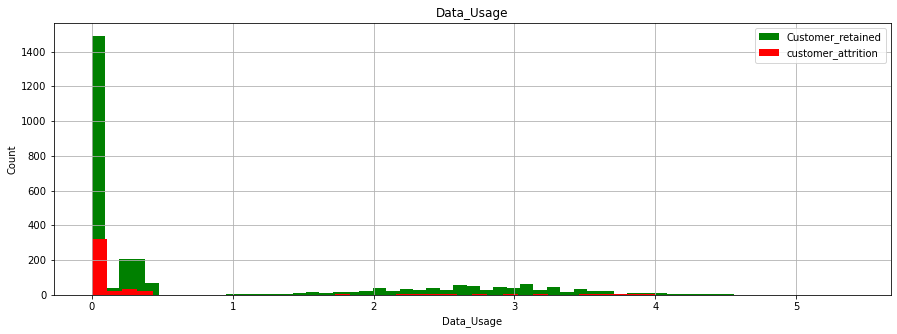

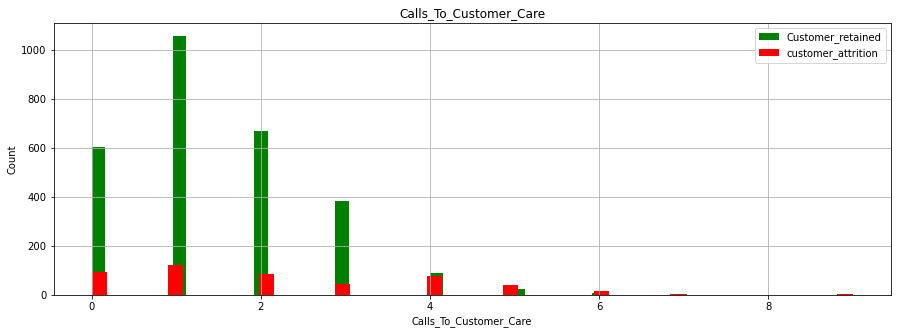

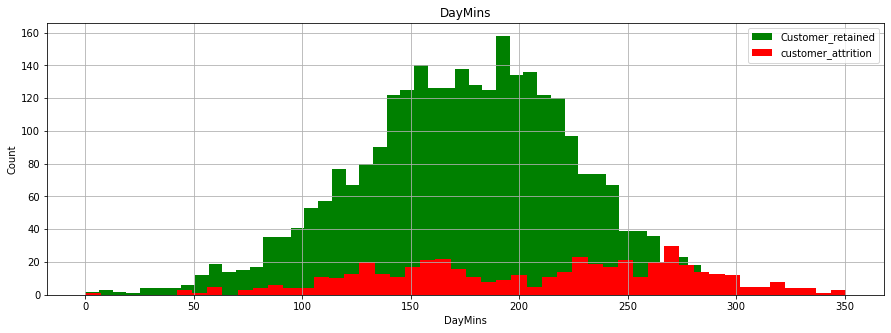

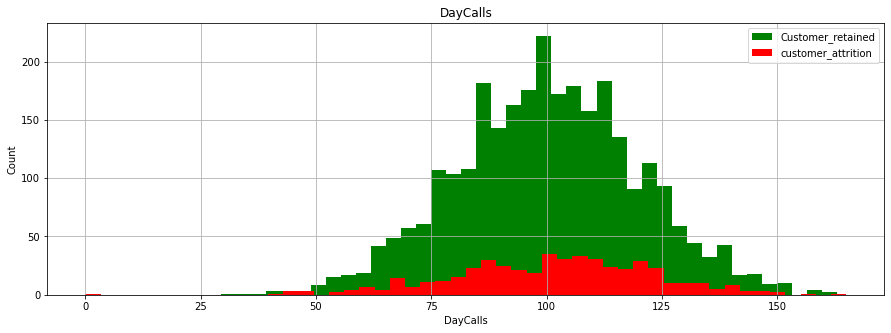

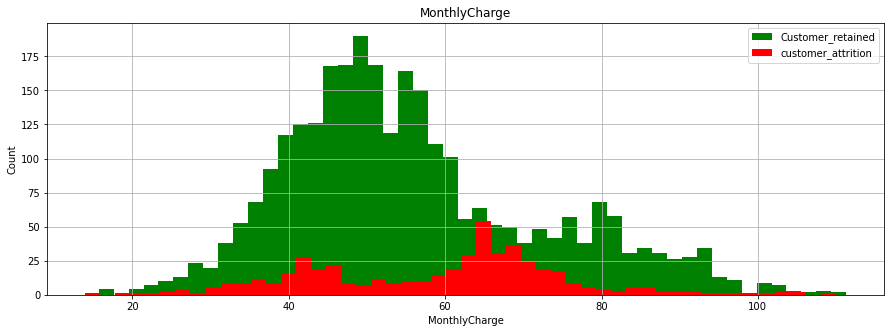

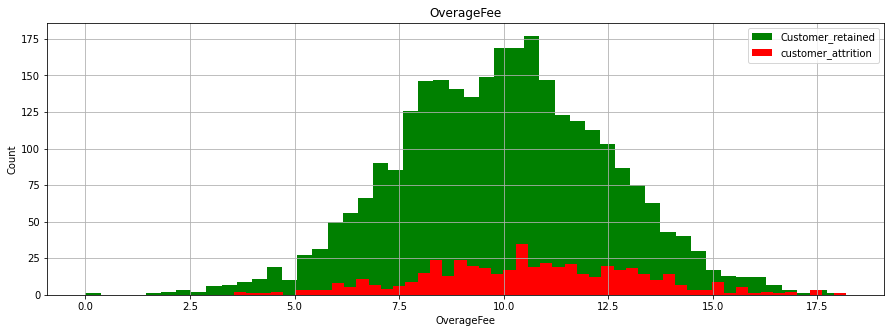

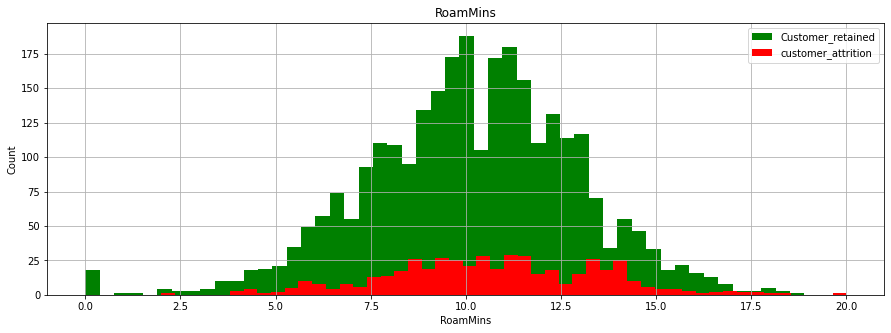

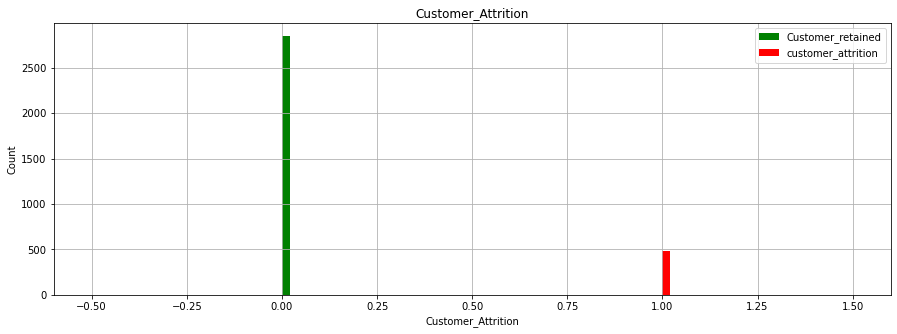

In [27]:
for feature in features:
    fig= plt.figure(figsize=(15,5))
    dataset_retained[feature].hist(bins=50, color='green', label='Customer_retained')
    dataset_attrition[feature].hist(bins=50, color='red', label='customer_attrition')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.legend(loc='upper right')
    plt.show()

<AxesSubplot:>

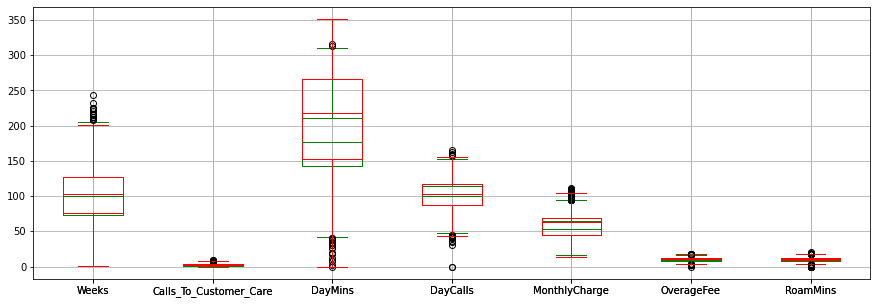

In [28]:
dataset_retained.boxplot(column = features_boxplot, figsize=(15,5), color='green')
dataset_attrition.boxplot(column = features_boxplot, figsize=(15,5), color='red')

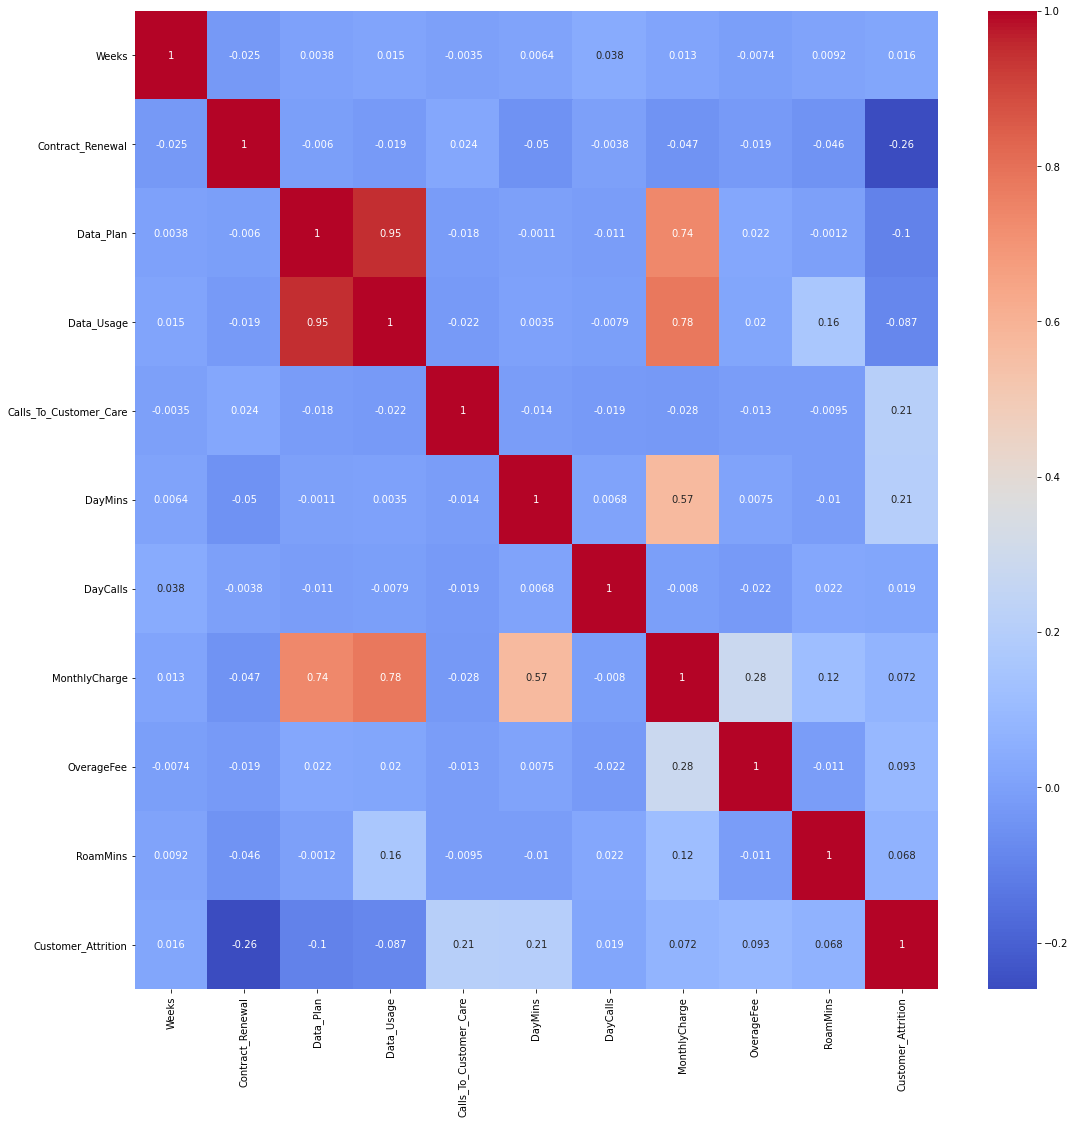

In [29]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = "coolwarm")
plt.show()

# Feature Engineering

### Train-test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.3)

In [32]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

### Feature selection using Random Forest

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [34]:
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=42),
threshold='0.8*median')

In [35]:
select.fit(X_train_scaled, y_train)
X_train_l1 = select.transform(X_train_scaled)
X_test_l1 = select.transform(X_test_scaled)
print("X_train_scaled.shape: {}".format(X_train_scaled.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
print("X_test_l1.shape: {}".format(X_test_l1.shape))

X_train_scaled.shape: (2331, 10)
X_train_l1.shape: (2331, 7)
X_test_l1.shape: (1000, 7)


[False  True False  True  True  True False  True  True  True]


Text(0.5, 0, 'Sample index')

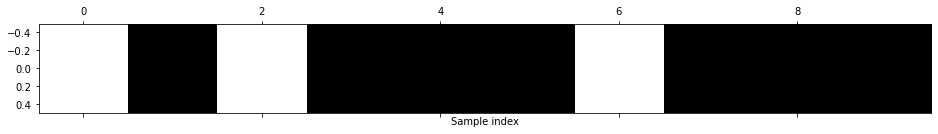

In [36]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

# Model Building and Evaluation

In [37]:
from collections import Counter
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, matthews_corrcoef

### Default Random forest Classifier

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train_l1, y_train)

RandomForestClassifier()

In [39]:
y_pred=rfc.predict(X_test_l1)
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))

Confusion Matrix:
 [[842  13]
 [ 46  99]]
Accuracy score: 0.941
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.88      0.68      0.77       145

    accuracy                           0.94      1000
   macro avg       0.92      0.83      0.87      1000
weighted avg       0.94      0.94      0.94      1000

Matthew Correlation Coefficient Score: 0.7453116835125085


### Random Forest Classifier with Over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
os=RandomOverSampler(0.70)
X_train_os,y_train_os= os.fit_resample(X_train_l1,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 1993, 1: 338})
The number of classes after fit Counter({0: 1993, 1: 1395})


C:\Users\MSI-PC\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [43]:
y_pred=rfc.predict(X_test_l1)
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))

Confusion Matrix:
 [[830  25]
 [ 35 110]]
Accuracy score: 0.94
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       855
           1       0.81      0.76      0.79       145

    accuracy                           0.94      1000
   macro avg       0.89      0.86      0.88      1000
weighted avg       0.94      0.94      0.94      1000

Matthew Correlation Coefficient Score: 0.7515303448641891


### Random Forest Classifier with SMOTETomek

In [44]:
from imblearn.combine import SMOTETomek

In [45]:
so=SMOTETomek(0.70)
X_train_so,y_train_so= so.fit_resample(X_train_l1,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_so)))

The number of classes before fit Counter({0: 1993, 1: 338})
The number of classes after fit Counter({0: 1960, 1: 1362})


C:\Users\MSI-PC\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train_so, y_train_so)

RandomForestClassifier()

In [47]:
y_pred=rfc.predict(X_test_l1)
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))

Confusion Matrix:
 [[817  38]
 [ 36 109]]
Accuracy score: 0.926
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       855
           1       0.74      0.75      0.75       145

    accuracy                           0.93      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.93      0.93      0.93      1000

Matthew Correlation Coefficient Score: 0.7032748145448995


### Random Forest Classifier with hypertuning and SMOTETomek

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [49]:
param_grid = {'n_estimators': [100, 150, 200], 'max_depth':[4,8,16], 'min_samples_split':[8,16,24]}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [50]:
grfc=GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv, n_jobs=-1, scoring='f1_macro')
grfc.fit(X_train_so,y_train_so)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 16],
                         'min_samples_split': [8, 16, 24],
                         'n_estimators': [100, 150, 200]},
             scoring='f1_macro')

In [51]:
print(grfc.best_estimator_)
grfc.best_params_


RandomForestClassifier(max_depth=16, min_samples_split=8, n_estimators=150)


{'max_depth': 16, 'min_samples_split': 8, 'n_estimators': 150}

In [52]:
y_pred=grfc.predict(X_test_l1)
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test,y_pred)))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))
print("Matthew Correlation Coefficient Score: {}".format(matthews_corrcoef(y_test,y_pred)))

Confusion Matrix:
 [[815  40]
 [ 32 113]]
Accuracy score: 0.928
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       855
           1       0.74      0.78      0.76       145

    accuracy                           0.93      1000
   macro avg       0.85      0.87      0.86      1000
weighted avg       0.93      0.93      0.93      1000

Matthew Correlation Coefficient Score: 0.7164784101716051


## Feature Importance

Feature: 0, Score: 0.12106
Feature: 1, Score: 0.10742
Feature: 2, Score: 0.22837
Feature: 3, Score: 0.19872
Feature: 4, Score: 0.17784
Feature: 5, Score: 0.09861
Feature: 6, Score: 0.06799


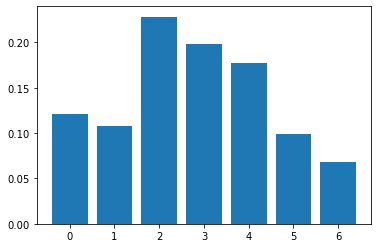

In [53]:
importance = grfc.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()